In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.options.display.max_rows=300

In [2]:
tt=pd.read_csv('kategorilendirilmiş.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\1-RAW\submission_file.csv')

In [3]:
test=tt.query("is_train==False").reset_index(drop=True)
train=tt.query("is_train==True").reset_index(drop=True)
submission['month_id']= pd.to_datetime(submission['month_id'],format='%Y%m')

ValueError: time data "2023-11-01" doesn't match format "%Y%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
merchant_counts = (tt.groupby('merchant_id')['date'].count() - 3).to_dict()

tt['active_months'] = tt['merchant_id'].map(merchant_counts)


# Plot

In [ ]:
merchant_10000	

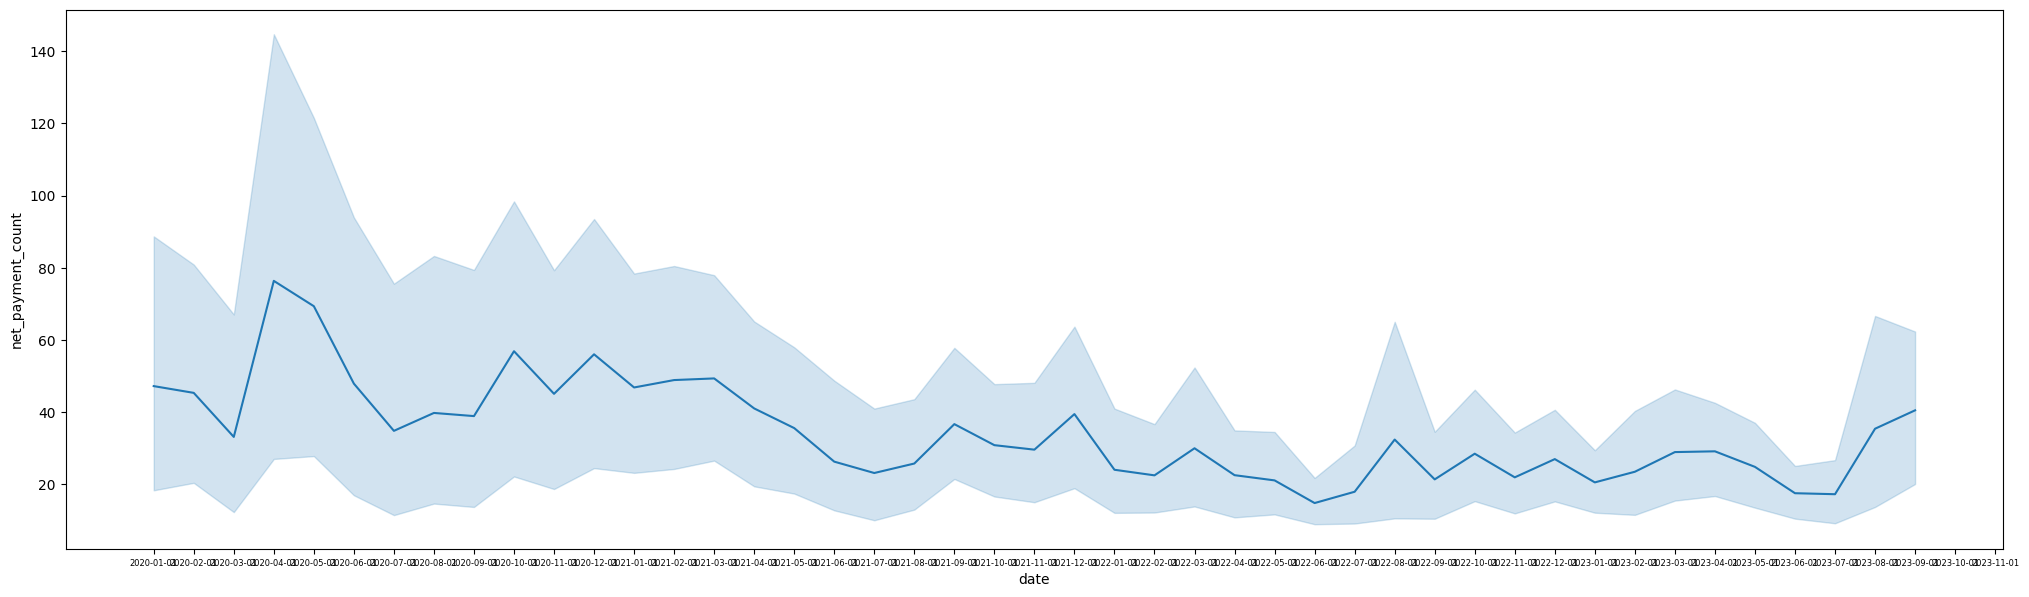

In [ ]:
plt.figure(figsize=(25,7))
# Now create your line plot with Seaborn
sns.lineplot(data=tt[tt['merchant_id']=='merchant_10000	'], x='date', y='net_payment_count')
plt.tick_params(axis='x',labelsize=6)
# Finally, display the plot
plt.show()

# Churnleri atalım

In [ ]:
churn_merchants=tt[tt['flag']==0].merchant_id.unique()
active_merchants=tt[tt['flag']==1].merchant_id.unique()
active_merchants.shape,churn_merchants.shape

In [ ]:
# submissiondaki churnlere 0 atayalım
submission.loc[submission['merchant_id'].isin(churn_merchants), 'net_payment_count'] = 0

In [ ]:
categories_to_train=tt[(tt['flag'] == 1)]['category'].unique()

In [ ]:
categories_to_train.shape

(963,)

In [ ]:
# train ve testi ayıralım
train=tt[tt.is_train==1].reset_index(drop=True)
test=tt[tt.is_train==0].reset_index(drop=True)

In [ ]:
train_notchurned=train[train['flag']==1].reset_index(drop=True)

In [ ]:
train_notchurned['category'].nunique()

963

In [ ]:
train_notchurned.to_csv('train_not_churned.csv',index=False)

In [ ]:
submission.to_csv('submission_with_churns.csv',index=False)

In [ ]:
train.to_csv('train_all.csv',index=False)

In [8]:
tt

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
0,merchant_43992,4997.0,2020-01-01,True,1283,1,45
1,merchant_47611,19878.0,2020-01-01,True,508,1,45
2,merchant_26604,2528.0,2020-01-01,True,814,1,45
3,merchant_50657,89.0,2020-01-01,True,137,1,45
4,merchant_60635,71957.0,2020-01-01,True,274,0,42
...,...,...,...,...,...,...,...
369317,merchant_5038,NaN,2023-12-01,False,109,0,12
369318,merchant_49937,NaN,2023-12-01,False,405,1,26
369319,merchant_6213,NaN,2023-12-01,False,347,0,5
369320,merchant_35969,NaN,2023-12-01,False,127,0,1


In [ ]:
test

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
0,merchant_36004,NaN,2023-10-01,False,885,0,4
1,merchant_23099,NaN,2023-10-01,False,57,0,2
2,merchant_13105,NaN,2023-10-01,False,958,0,1
3,merchant_32059,NaN,2023-10-01,False,11,0,8
4,merchant_63368,NaN,2023-10-01,False,100,1,3
...,...,...,...,...,...,...,...
78175,merchant_5038,NaN,2023-12-01,False,109,0,12
78176,merchant_49937,NaN,2023-12-01,False,405,1,26
78177,merchant_6213,NaN,2023-12-01,False,347,0,5
78178,merchant_35969,NaN,2023-12-01,False,127,0,1


# Trial for the merchants in the most frequent category

In [ ]:
train_notchurned[train_notchurned['category']==199].head(300)

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
46,merchant_60540,7.0,2020-01-01,True,199,1,45
113,merchant_48585,4.0,2020-01-01,True,199,1,42
130,merchant_43413,14.0,2020-01-01,True,199,1,40
536,merchant_64637,18.0,2020-01-01,True,199,1,43
655,merchant_12685,5.0,2020-01-01,True,199,1,36
686,merchant_1814,10.0,2020-01-01,True,199,1,44
717,merchant_780,36.0,2020-01-01,True,199,1,45
814,merchant_7893,20.0,2020-01-01,True,199,1,45
830,merchant_45977,3.0,2020-01-01,True,199,1,45
858,merchant_34959,3.0,2020-01-01,True,199,1,32


In [ ]:
categories_to_train

array([1283,  508,  814,  137, 1076, 1068,  693,  523,  696,  533,  573,
       1073,  532, 1097,  127, 1360, 1099,  405,  485,  102,  100,  301,
        649,  852,  475,  476, 1058,  883,  564,  406,  362,  101, 1351,
        162,  590,  709,  104,  163,  767,  199,  612,  283, 1343,  131,
        643,  853,  710,  905,  712,  486,  109,  741, 1359,  286,  128,
        882, 1312,   86,  527,  165,  443,  451, 1092,  781, 1083,  881,
        250,  130,  611,  973,  594, 1085,  692,  200,   14,  844, 1176,
       1040,  487,  646,  913,  251, 1096, 1203, 1287,  287,  169,  985,
        702,  189,  399, 1296,  187,  495,  557, 1109,  701, 1081,  766,
        690,   67,  437,  584,  263, 1055,  824,  222,    9,  851, 1070,
       1278,  493,   10,  857, 1174,  638, 1207,  755,  148, 1065,  120,
        997,  158, 1074, 1352,  522,  992, 1220, 1090, 1273,  246,   95,
       1038,  464, 1298,  990,  119,  535,   46,  400,  438,  337, 1300,
        242,  521,  245, 1162,  219, 1145, 1313,  5

In [ ]:
train

In [9]:
tt.to_csv('all_data.csv',index=False)